#### Initial Report: Predicting Used Car Prices Using Machine Learning

#### 1. Introduction

This report aims to predict the prices of used cars using various machine learning models. Accurate price predictions can help buyers and sellers make informed decisions and assist dealerships in optimizing their pricing strategies.

#### 2. Data Collection and Exploration

The dataset used in this project is sourced from Kaggle, containing information on used cars, including features like make, model, year, mileage, and price.

#### 3. Exploratory Data Analysis (EDA)

EDA helps in understanding the data distribution, identifying missing values, and detecting outliers. Below is the code for EDA with visualizations.

In [22]:
#Step-1 : Load the Dataset
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import FunctionTransformer
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, TransformedTargetRegressor
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

import warnings

df = pd.read_csv('data/vehicles.csv')
df.head()




,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [23]:
missing_percentage = df.isnull().mean() * 100
print(missing_percentage)

id               0.000000
region           0.000000
price            0.000000
year             0.282281
manufacturer     4.133714
model            1.236179
condition       40.785232
cylinders       41.622470
fuel             0.705819
odometer         1.030735
title_status     1.930753
transmission     0.598763
VIN             37.725356
drive           30.586347
size            71.767476
type            21.752717
paint_color     30.501078
state            0.000000
dtype: float64


In [24]:
#Checking Unique Values
for col in df.select_dtypes(include=['object']).columns:
    print(f'{col}: {df[col].nunique()} unique values')

region: 404 unique values
manufacturer: 42 unique values
model: 29649 unique values
condition: 6 unique values
cylinders: 8 unique values
fuel: 5 unique values
title_status: 6 unique values
transmission: 3 unique values
VIN: 118246 unique values
drive: 3 unique values
size: 4 unique values
type: 13 unique values
paint_color: 12 unique values
state: 51 unique values


#### 4. Data Preprocessing
Data preprocessing involves handling missing values, feature engineering, and data normalization.

In [25]:
    #Dropping entire size column as 71% of entries are missing this 
    #Dropping VIN column and id column as its unique and wont be useful
    #Dropping region as state column is present
    #Dropping model as well as number of unique values are huge
    #Finally dropping all the missing values
    
df.drop(['size','VIN','id', 'region','model'], axis=1, inplace=True)
df=df.dropna()


df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 117169 entries, 31 to 426878
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         117169 non-null  int64  
 1   year          117169 non-null  float64
 2   manufacturer  117169 non-null  object 
 3   condition     117169 non-null  object 
 4   cylinders     117169 non-null  object 
 5   fuel          117169 non-null  object 
 6   odometer      117169 non-null  float64
 7   title_status  117169 non-null  object 
 8   transmission  117169 non-null  object 
 9   drive         117169 non-null  object 
 10  type          117169 non-null  object 
 11  paint_color   117169 non-null  object 
 12  state         117169 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 12.5+ MB


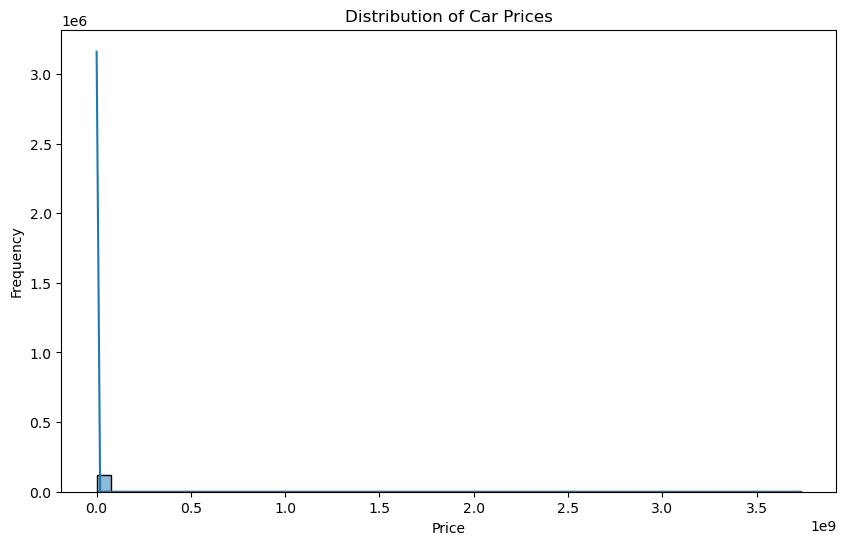

11408077.858953945 60823.21773677338


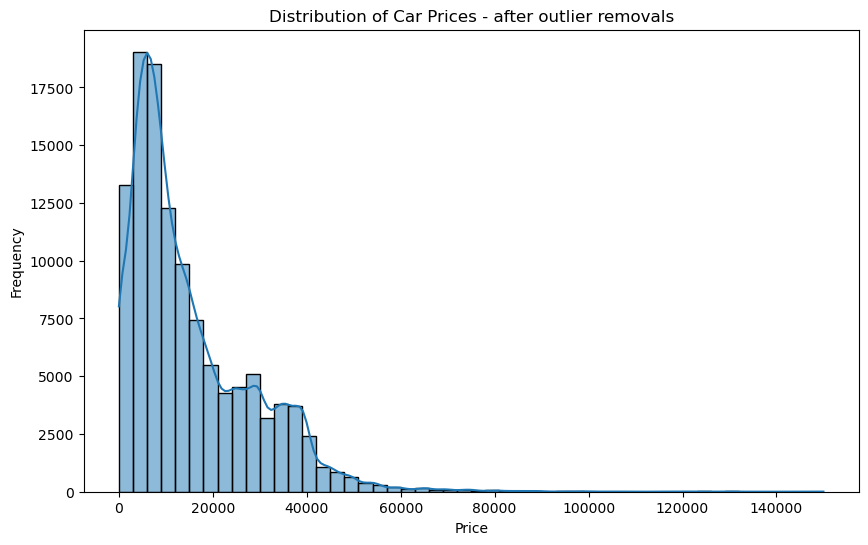

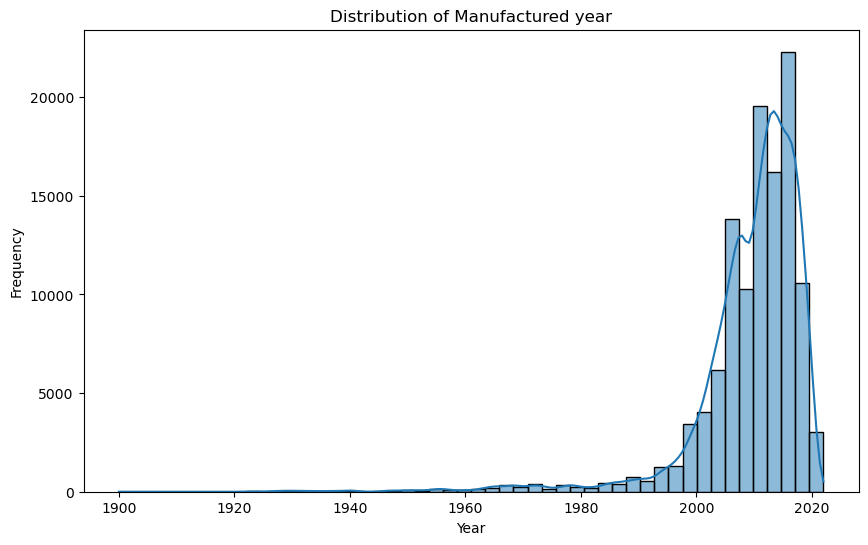

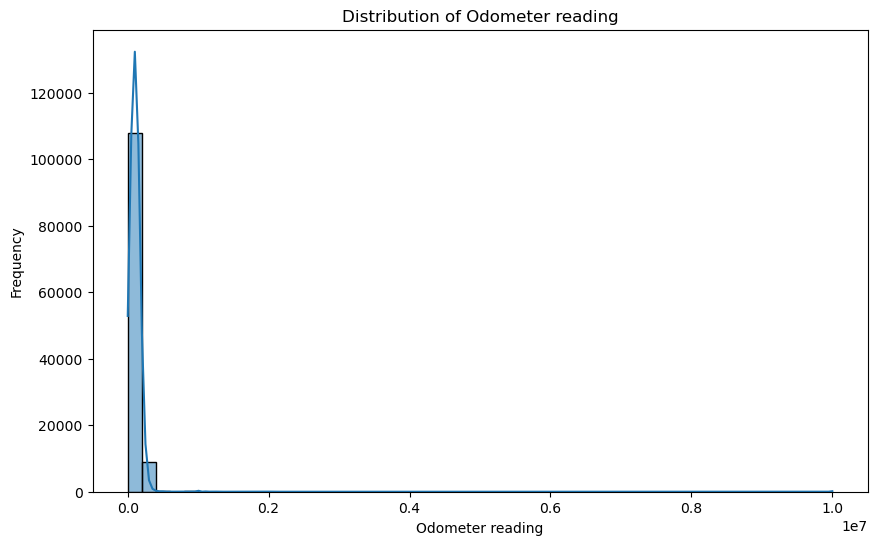

224802.19684504103 112285.4658341087


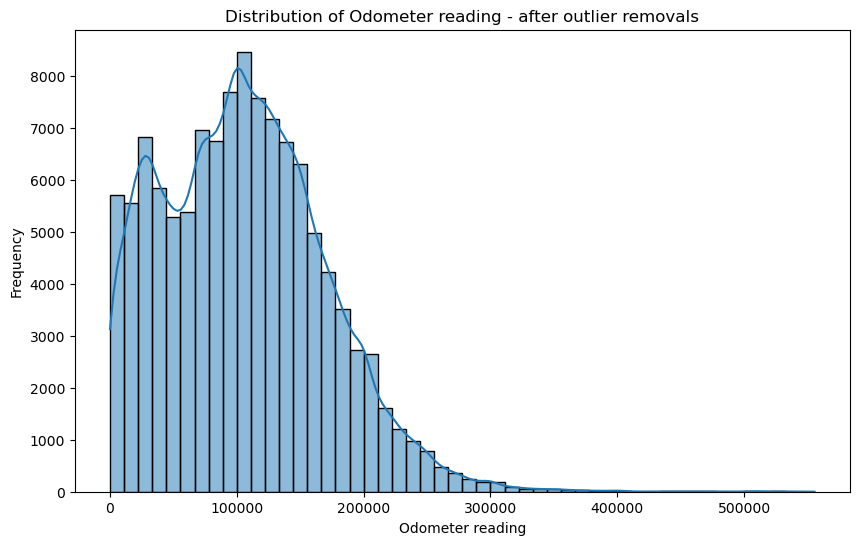

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

##Remove outliers
std = df['price'].std() 
mean = df['price'].mean()
print(std, mean)
df[df['price']>150000].count()
df = df[df['price']<=150000]

plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distribution of Car Prices - after outlier removals')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


plt.figure(figsize=(10, 6))
sns.histplot(df['year'], bins=50, kde=True)
plt.title('Distribution of Manufactured year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df['odometer'], bins=50, kde=True)
plt.title('Distribution of Odometer reading')
plt.xlabel('Odometer reading')
plt.ylabel('Frequency')
plt.show()

std = df['odometer'].std() 
mean = df['odometer'].mean()

print(std, mean)

df = df[df['odometer']<= mean+2*std]

plt.figure(figsize=(10, 6))
sns.histplot(df['odometer'], bins=50, kde=True)
plt.title('Distribution of Odometer reading - after outlier removals')
plt.xlabel('Odometer reading')
plt.ylabel('Frequency')
plt.show()

#### 5. Model Building and Evaluation

We will build and evaluate multiple models, including linear regression, decision trees. We will also use cross-validation and grid search for hyperparameter tuning.

In [28]:
X = df.drop('price', axis = 1)

y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=45)


##### Linear regression

In [29]:

# encode categorized columns, normalize, scale, feature select, and linreg:

col_transformer = make_column_transformer((OneHotEncoder(drop = 'if_binary'), ['manufacturer', 'fuel','title_status',
                                                                               'transmission','state', 'condition', 
                                                                               'drive', 'type', 'cylinders', 'paint_color']), 
                                          remainder='passthrough')


pipe_lr = Pipeline([
                ('col_transformer', col_transformer), 
                ('normalize', QuantileTransformer(output_distribution='normal')),
                ('scaler', StandardScaler(with_mean=False)), 
                ('model', LinearRegression())])

pipe_lr
pipe_lr.fit(X_train, y_train)

# Predictions
y_pred_lr = pipe_lr.predict(X_test)

# Evaluation
print('Linear Regression test RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_lr)))

Linear Regression test RMSE: 8313.263950545823


#### Lasso and Ridge with hyperparameter tuning

In [ ]:
# Ridge Regression Hyperparameter Tuning
pipe_r = Pipeline([
                ('col_transformer', col_transformer), 
                ('normalize', QuantileTransformer(output_distribution='normal')),
                ('scaler', StandardScaler(with_mean=False)), 
                ('model', Ridge())])

ridge_params = {'model__alpha': [0.1, 1.0, 10.0, 100.0]}
ridge_grid = GridSearchCV(pipe_r, ridge_params, cv=5, scoring='neg_mean_squared_error')
ridge_grid.fit(X_train, y_train)
best_ridge = ridge_grid.best_estimator_
y_pred_best_ridge = best_ridge.predict(X_test)

print('Best Ridge Regression test RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_best_ridge)))

# Lasso Regression Hyperparameter Tuning
pipe_l = Pipeline([
                ('col_transformer', col_transformer), 
                ('normalize', QuantileTransformer(output_distribution='normal')),
                ('scaler', StandardScaler(with_mean=False)), 
                ('model', Lasso())])
lasso_params = {'model__alpha': [0.01, 0.1, 1.0, 10.0]}
lasso_grid = GridSearchCV(pipe_l, lasso_params, cv=5, scoring='neg_mean_squared_error')
lasso_grid.fit(X_train, y_train)
best_lasso = lasso_grid.best_estimator_
y_pred_best_lasso = best_lasso.predict(X_test)

print('Best Lasso Regression test RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_best_lasso)))

Best Ridge Regression test RMSE: 8323.147132650207


#### The report demonstrates the application of various machine learning models to predict used car prices. Lasso model showed better performance. Will be using more models and neural networks in final project to apply the concepts learned
